# Predicting Bike Rentals
## Introduction

Many American cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.

Hadi Fanaee-T at the University of Porto compiled this data into a CSV file. The file contains 17380 rows, with each row representing the number of bike rentals for a single hour of a single day. This data is available through the University of California, Irvine's website.

## Purpose
I will attempt to predict the total number of bikes people rented in a given hour. I'll predict the `cnt` (total number of bike rentals) column using all of the other columns, except for casual and registered. To accomplish this, I'll create a few different machine learning models and evaluate their performance.

## Data
Here are the descriptions for the relevant columns:

* `instant` - A unique sequential ID number for each row
* `dteday` - The date of the rentals
* `season` - The season in which the rentals occurred
* `yr` - The year the rentals occurred
* `mnth` - The month the rentals occurred
* `hr` - The hour the rentals occurred
* `holiday` - Whether or not the day was a holiday
* `weekday` - The day of the week (as a number, 0 to 7)
* `workingday` - Whether or not the day was a working day
* `weathersit` - The weather (as a categorical variable)
* `temp` - The temperature, on a 0-1 scale
* `atemp` - The adjusted temperature
* `hum` - The humidity, on a 0-1 scale
* `windspeed` - The wind speed, on a 0-1 scale
* `casual` - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
* `registered` - The number of registered riders (people who had already signed up)
* `cnt` - The total number of bike rentals (casual + registered)

I will read the data in as a dataframe and perform some initial exploratory analyses.

In [1]:
import pandas as pd
import numpy as np
#preview the data
bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


I want to start by examining the distribution of data in the `cnt` column.

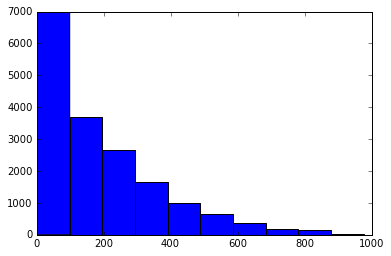

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

#visualizing the 'cnt' column
plt.hist(bike_rentals.cnt)
plt.show()

I also want to explore how each column in the dataframe is correlated with `cnt`.

In [3]:
bike_rentals.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


Columns with a moderate correlation to `cnt` is `hr`, `temp`, and `atemp`.
The columns `casual` and `registered` have a strong correlation to `cnt`, however this is to be expected since `cnt` is the sum of the two columns.

## Calculating Features
The `hr` column in bike_rentals contains the hours during which bikes are rented, from 1 to 24. A machine will treat each hour differently, without understanding that certain hours are related. I can introduce some order into the process by creating a new column with labels for morning, afternoon, evening, and night. This will bundle similar times together, enabling the model to make better decisions.

In [4]:
def assign_labels(hour):
    if hour in range(6,12):
        return 1
    elif hour in range(12,18):
        return 2
    elif hour in range(18,24):
        return 3
    elif hour in range(0,6):
        return 4
    
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_labels)
print(bike_rentals[['hr','time_label']].head(10))

   hr  time_label
0   0           4
1   1           4
2   2           4
3   3           4
4   4           4
5   5           4
6   6           1
7   7           1
8   8           1
9   9           1


Before I apply any machine learning algorithms, I need to split the data into training and testing sets. I'll use 80% of the data for training.

In [5]:
train = bike_rentals.sample(frac=0.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

## Applying Linear Regression
Now that I'm done manipulating the data and preparing it for analysis, I want to apply linear regression to the data to find optimal parameter values to use as model features. This seems like the best course of action since several of the columns in the data set are independent of the target column, `cnt`.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = list(train.columns)
features.remove("cnt")
features.remove("casual")
features.remove("registered")
features.remove("dteday")

lr = LinearRegression()

lr.fit(train[features], train["cnt"])

#making predictions
predictions = lr.predict(test[features])

#calculating error
mse = mean_squared_error(predictions, test["cnt"])

print("MSE:{:,.0f}".format(mse))

MSE:18,223


The resulting error is 18,223 bike riders. This is a large error considering there very few high rental counts. I will compare this error with the error I get from applying the decision tree algorithm.

## Applying Decision Trees

In [7]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(min_samples_leaf=5)

reg.fit(train[features],train["cnt"])

tree_predictions = reg.predict(test[features])

tree_mse = mean_squared_error(tree_predictions,test["cnt"])
print("MSE:{:,.0f}".format(tree_mse))

MSE:2,705


Using the decision tree algorithm has greatly reduced the error. I will test this again with different model parameters to see if this changes the error.
### Alter 'min_samples_leaf' parameter

In [8]:
reg = DecisionTreeRegressor(min_samples_leaf=2)

reg.fit(train[features],train["cnt"])

tree_predictions = reg.predict(test[features])

tree_mse = mean_squared_error(tree_predictions,test["cnt"])
print("MSE:{:,.0f}".format(tree_mse))

MSE:3,109


In [15]:
reg = DecisionTreeRegressor(min_samples_leaf=50)

reg.fit(train[features],train["cnt"])

tree_predictions = reg.predict(test[features])

tree_mse = mean_squared_error(tree_predictions,test["cnt"])
print("MSE:{:,.0f}".format(tree_mse))

MSE:4,327


|parameter settings | MSE |
|-------------------|-----|
|initial; min_samples_leaf = 5| 2,705|
|min_samples_leaf = 2| 3,109|
|min_samples_leaf = 50| 4,327|


### Using Random Feature Subsets, splitter parameter

In [21]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(splitter='random',min_samples_leaf=5)

reg.fit(train[features],train["cnt"])

tree_predictions = reg.predict(test[features])

tree_mse = mean_squared_error(tree_predictions,test["cnt"])
print("MSE:{:,.0f}".format(tree_mse))

MSE:3,194


In [17]:
reg = DecisionTreeRegressor(splitter='random', min_samples_leaf=2)

reg.fit(train[features],train["cnt"])

tree_predictions = reg.predict(test[features])

tree_mse = mean_squared_error(tree_predictions,test["cnt"])
print("MSE:{:,.0f}".format(tree_mse))

MSE:3,776


In [18]:
reg = DecisionTreeRegressor(splitter='random', min_samples_leaf=50)

reg.fit(train[features],train["cnt"])

tree_predictions = reg.predict(test[features])

tree_mse = mean_squared_error(tree_predictions,test["cnt"])
print("MSE:{:,.0f}".format(tree_mse))

MSE:5,915


|parameter settings | MSE |
|-------------------|-----|
|initial; min_samples_leaf(msl) = 5| 2,705|
|msl = 2| 3,109|
|msl = 50| 4,327|
|splitter = random; msl = 5 | 3,194|
|splitter = random; msl = 2 | 3,776|
|splitter = random; msl = 50 |5,915|

### Altering 'max_depth'

In [24]:
reg = DecisionTreeRegressor(splitter='random', max_depth=5)

reg.fit(train[features],train["cnt"])

tree_predictions = reg.predict(test[features])

tree_mse = mean_squared_error(tree_predictions,test["cnt"])
print("MSE:{:,.0f}".format(tree_mse))

MSE:12,589


In [31]:
reg = DecisionTreeRegressor(splitter='random', max_depth=10)

reg.fit(train[features],train["cnt"])

tree_predictions = reg.predict(test[features])

tree_mse = mean_squared_error(tree_predictions,test["cnt"])
print("MSE:{:,.0f}".format(tree_mse))

MSE:4,231


|parameter settings | MSE |
|-------------------|-----|
|initial; min_samples_leaf(msl) = 5| 2,705|
|msl = 2| 3,109|
|msl = 50| 4,327|
|splitter = random; msl = 5 | 3,194|
|splitter = random; msl = 2 | 3,776|
|splitter = random; msl = 50 |5,915|
|splitter = random; max_depth = 5|12,589|
|splitter = random; max_depth = 10 | 4,231|

There was a large increase in MSE when changing the tree depth from 5 to 10. It may be easier to visualize the effect of altering the max tree depth using a plot.

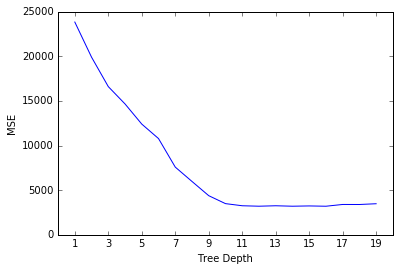

In [30]:
mses = []
for i in range(1,20):
    reg = DecisionTreeRegressor(max_depth=i)
    reg.fit(train[features],train["cnt"])

    tree_predictions = reg.predict(test[features])

    tree_mse = mean_squared_error(tree_predictions,test["cnt"])
    
    mses.append(tree_mse)
    
plt.plot(range(1,20), mses)
plt.xticks(np.arange(1,21,2.0))
plt.xlabel("Tree Depth")
plt.ylabel("MSE")

In the plot above it appears that error decreases with a deeper tree, however having a deeper tree leads to the model over fitting the data.
Setting the splitter parameter to random seemed to level out the error when altering min_samples_leaf.

## Applying Random Forests
Now I will apply the random forest algorithm, which improves on the decision tree algorithm and tend to be more accurate.

In [58]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(min_samples_leaf=5) #n_estimators=10 by default
reg.fit(train[features], train["cnt"])
predictions = reg.predict(test[features])
mse = mean_squared_error(predictions,test["cnt"])
print("MSE:{:,.0f}".format(tree_mse))

MSE:4,231


In [61]:
reg = RandomForestRegressor(min_samples_leaf=20) #n_estimators=10 by default
reg.fit(train[features], train["cnt"])
predictions = reg.predict(test[features])
mse = mean_squared_error(predictions,test["cnt"])
print("MSE:{:,.0f}".format(tree_mse))

MSE:4,231


In [59]:
reg = RandomForestRegressor(n_estimators=5,random_state=1,min_samples_leaf=10)
reg.fit(train[features], train["cnt"])
predictions = reg.predict(test[features])
mse = mean_squared_error(predictions,test["cnt"])
print("MSE:{:,.0f}".format(tree_mse))

MSE:4,231


In [60]:
reg = RandomForestRegressor(n_estimators=5,random_state=1,max_depth=10)
reg.fit(train[features], train["cnt"])
predictions = reg.predict(test[features])
mse = mean_squared_error(predictions,test["cnt"])
print("MSE:{:,.0f}".format(tree_mse))

MSE:4,231


It seems that changing the parameters of the Random Forest Regressor doesn't change the error, which leaves me with an error of 4,231 bikes. This error seems to be within the realm of possibility given the errors calculated using Decision Trees. I'll visualize this data with a bar chart to show the difference between my predictions and the target.

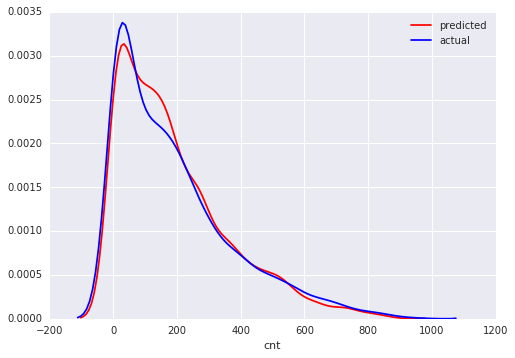

In [129]:
import seaborn as sns
yhat = pd.Series(predictions)
y = test['cnt']

sns.distplot(yhat,color='red',hist=False,label='predicted')
sns.distplot(y,color='blue',hist=False,label='actual')

From the visualization I can see that my model is relatively accurate at predicting the total number of bike rentals.